# GEOG 308 - PySAL Demo for Spatial Data Preparation & GeoVisualization

<font size="3">
Dr. Aynaz Lotfata <br>
Visiting Assistant Professor <br>
Miami University 
</font>

This short demo will show you how to:
1. Create geographic data from flat text or raw geometries
2. Write out that data to file
3. Plot the data on a map
4. Geovisualization by a specific attribute

Following Python packages will be used for the tutorial

In [59]:
import geopandas as gpd # to read/write spatial data
import matplotlib.pyplot as plt # to visualize data
import pandas # to read/write plain tables

# to display a few webpages within the notebook
from IPython.display import IFrame

import libpysal as lp #pysal library
import seaborn as sbn #statistical distribution plotting

%matplotlib inline

# Reading data

Following Points to note:
1. In many cases, you may have *prepared* data in format such as shapefiles, `tiff` rasters, geopackage `.gpkg` files.
2. A common issue when working with databases having *raw* data is how to create geodata from flat text files.

We will use sample data from [insideairbnb.com](https://insideairbnb.com) which contains features & prices for AirBnB locations in *Austin, TX*

In [60]:
listings = pandas.read_csv('../data/listings.csv.gz')
neighborhoods = pandas.read_csv('../data/neighborhoods.csv')

Let us see how many `listings` and how many `neighborhoods` do the two datasets contain:

In [61]:
print(listings.shape) 
print(neighborhoods.shape)

(11792, 107)
(44, 3)


For the first dataset, the `listings` data, records are provided with information about the latitude & longitude of the listing.

Let us see the first 5 rows of `listings` data:

In [62]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,1078,https://www.airbnb.com/rooms/1078,20190514155147,2019-05-14,*UT/Hyde Park Craftsman Apartment,This upstairs apartment is surrounded by trees...,The garage apartment was built in the 1920s an...,This upstairs apartment is surrounded by trees...,none,"Hyde Park is close to downtown, UT, 6th street...",...,f,flexible,f,f,2,2,0,0,1.70,POINT (-97.73674 30.30123)
1,2265,https://www.airbnb.com/rooms/2265,20190514155147,2019-05-14,Zen-East in the Heart of Austin,Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.19,POINT (-97.71398000000001 30.2775)
2,5245,https://www.airbnb.com/rooms/5245,20190514155147,2019-05-14,"Green, Colorful, Clean & Cozy home",NaN,Situated in a vibrant & diverse multicultural ...,Situated in a vibrant & diverse multicultural ...,none,NaN,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.07,POINT (-97.71379 30.27577)
3,5456,https://www.airbnb.com/rooms/5456,20190514155147,2019-05-14,"Walk to 6th, Rainey St and Convention Ctr",Fabulous location for walking to Convention Ce...,Cute Private Studio apartment located in Willo...,Fabulous location for walking to Convention Ce...,none,My neighborhood is ideally located if you want...,...,f,strict_14_with_grace_period,f,t,1,1,0,0,3.88,POINT (-97.73448 30.26112)
4,5769,https://www.airbnb.com/rooms/5769,20190514155147,2019-05-14,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,none,Quiet neighborhood with lots of trees and good...,...,f,moderate,t,t,1,0,1,0,2.22,POINT (-97.7837 30.45596)


Let us see the what columns are in the `listings` data

In [63]:
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_hood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'hood',
 'hood_cleansed',
 'hood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_p

From all the columns, following columns that contain geographic information can be used from the above dataframe:
1. city
2. state
3. zipcode
4. hood, which means neighborhood
5. country
6. latitude & longitude, which are the coordinates of the listing
geometry, which is the well-known text representation of the point iself.

Now, let us look at the `neighborhoods` data
1. Examine the first 5 rows in this dataset
2. Identify names of columns in this dataset

In [64]:
neighborhoods.head()

,hood_id,hood_group,wkb
0,78739,NaN,01060000000100000001030000000100000077020000AC...
1,78754,NaN,01060000000100000001030000000100000074010000B1...
2,78732,NaN,0106000000010000000103000000010000009601000082...
3,78737,NaN,010600000001000000010300000001000000F1000000A4...
4,78756,NaN,010600000001000000010300000001000000DE0000007E...


In [65]:
list(neighborhoods.columns)

['hood_id', 'hood_group', 'wkb']

What is the **wkb** field above?
1. It is the only field that is useful in constructing the geometric representation of the data.
2. It is called *well-known binary representation* - a common format to represent geographic information.
3. `neighborhoods` are represented by *polygons*. 
4. **wkb** field above encodes the shape of these *polygons*

# Creating Geometries from raw co-ordinates

For the `listings` dataset, `geopandas` is used to construct a *"geodataframe"*, useful for working with geographic data, directly from coordinates. 

We can do this using the `points_from_xy` function using *latitudes* and *longitudes* data from `listings`:

In [66]:
geometries = geopandas.points_from_xy(listings.longitude, listings.latitude)

Then we make a geodataframe for `listings` as follows:

In [67]:
listings = geopandas.GeoDataFrame(listings, geometry=geometries)

How about for the `neighborhoods` data:
1. For the `neighborhoods` data, we must parse the well-known binary. 
2. The package that handles geometric data in Python is called `shapely`. 3. Using the `wkb` module in `shapely`, we can parse the well-known binary and obtain a geometric representation for the neighborhoods:

In [68]:
from shapely import wkb

In [69]:
neighborhoods['geometry'] = neighborhoods.wkb.apply(lambda shape: wkb.loads(shape, hex=True))

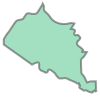

In [70]:
neighborhoods.geometry[0]

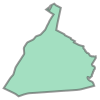

In [71]:
neighborhoods.geometry[1]

In [72]:
neighborhoods = geopandas.GeoDataFrame(neighborhoods)
neighborhoods.drop('wkb', axis=1, inplace=True)

What kind of geometries do each type of data represent?
1. `listings` is a **POINT**
2. `neighborhoods` is a **MULTIPOLYGON**

In [73]:
listings.geometry[[0]]

0    POINT (-97.73674 30.30123)
Name: geometry, dtype: geometry

In [74]:
neighborhoods.geometry[[1]]

1    MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...
Name: geometry, dtype: geometry

Let us pick an appropriate co-ordinate reference system for data in raw latitude/longitude values. This can be `espg:4326` format -- details available at [epsg.io/4326](https://epsg.io/4326) (WGS 84 -- WGS84 - World Geodetic System 1984, used in GPS)

In [75]:
listings.crs = {'init':'epsg:4326'}
neighborhoods.crs = {'init': 'epsg:4326'}

/srv/conda/envs/notebook/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Then, we can write them out to file using the `to_file` method on a geodataframe: 

In [76]:
neighborhoods.to_file('../data/neighborhoods.gpkg', driver='GPKG')
listings.to_file('../data/listings.gpkg', driver='GPKG')

# Plotting neighborhoods and listings together

Let us pick an appropriate co-ordinate reference system for data in raw latitude/longitude values. This can be `espg:3857` format -- details available at [epsg.io/3857](https://epsg.io/3857) (WGS 84 / Pseudo-Mercator -- Spherical Mercator, Google Maps, OpenStreetMap, Bing, ArcGIS, ESRI)

In [77]:
listings = listings.to_crs(epsg=3857)
neighborhoods = neighborhoods.to_crs(epsg=3857)

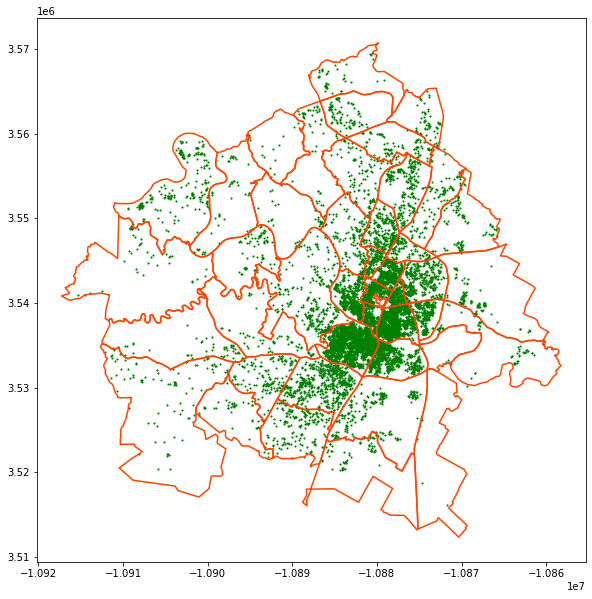

In [78]:
plt.figure(figsize=(10, 10))
neighborhoods.boundary.plot(ax=plt.gca(), color='orangered')
listings.plot(ax=plt.gca(), marker='.', markersize=5, color='green')

# Geo-visualization 

Read files saved previously and drop $ sign in price of listing

In [79]:
df = gpd.read_file('../data/neighborhoods.gpkg')
listings = gpd.read_file('../data/listings.gpkg')
listings['price'] = listings.price.str.replace('$', '').str.replace(',','_').astype(float)
# was created in previous notebook with df.to_file('data/neighborhoods.gpkg')

Since price is available by `listings` we will have to calculate median price for every neighborhood before geovisualization

In [80]:
median_price = gpd.sjoin(listings[['price', 'geometry']], df, op='within')\
                  .groupby('index_right').price.median()
df['median_pri'] = median_price.values

In [81]:
df['median_pri'].fillna((df['median_pri'].mean()), inplace=True)

Plotting the distribution of median price of all neighborhoods

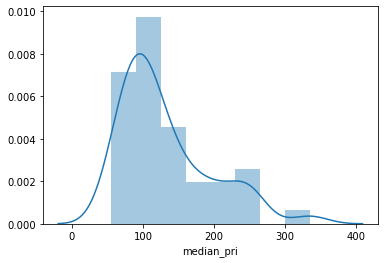

In [82]:
sbn.distplot(df['median_pri'])

Geovisualizing neighborhoods by median prices

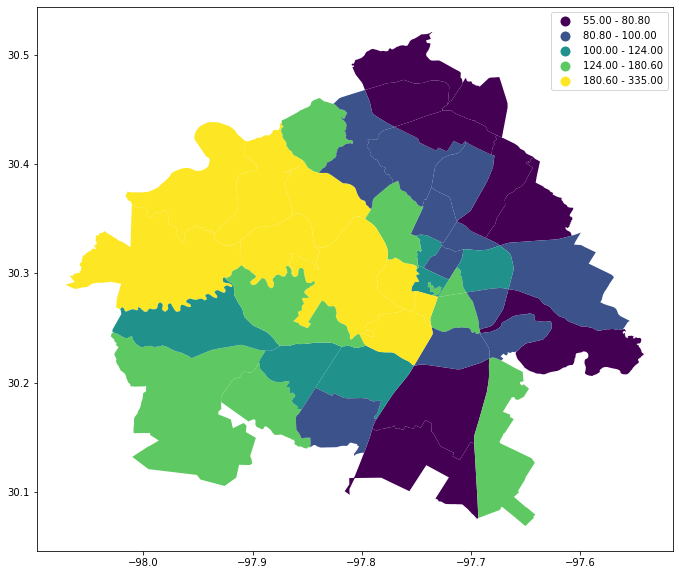

In [83]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='median_pri', scheme='Quantiles',  legend=True, ax=ax)